# Naive Bayes Classifiers

## Objectives

- Describe how Bayes's Theorem can be used to make predictions of a target
- Identify the appropriate variant of Naive Bayes models for a particular business problem

## Bringing Back Bayes

> "Naive Bayes classifiers are linear classifiers that are known for being **simple yet very efficient**. The probabilistic model of naive Bayes classifiers is based on Bayes’ theorem, and the adjective naive comes from the assumption that the features in a dataset are **mutually independent**. In practice, the independence assumption is often violated, but naive Bayes classifiers **still tend to perform very well** under this unrealistic assumption. Especially for small sample sizes, naive Bayes classifiers can outperform the more powerful alternatives."

[Source: Sebasitian Raschka: Naive Bayes and Text Classification](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html) (emphasis is mine)

Revisiting the theorem itself:

![breaking down the function behind naive bayes](images/naive_bayes_icon.png)

### Now let's introduce how we'll use it as a classifier!

<img src="images/another_one.png" width=750 alt="further breakdown of the pieces of naive bayes">

Notice how, when we move from the pure Bayes theorem to just comparing ratios, we effectively abstract away $P(\text{features})$! That actually simplifies our work - rather than calculating the exact probability for each label given the features, all we need to do is compare relative numerators to know which label (or target class) is more likely! 

## Let's Explore:

First, let's walk through [Chris Albon's description of Naive Bayes Classifiers from Scratch!](https://chrisalbon.com/code/machine_learning/naive_bayes/naive_bayes_classifier_from_scratch/)

## Our First Scenario: Spam Detection

Spam, Spam, Spam, Spam, Spam...

<img src="images/wall_of_spam.jpeg" alt="Many cans of spam" width=600>

> This is the classic example: detecting email spam!

**The Problem Setup**

> We get emails that can be either emails we care about (***ham*** 🐷) or emails we don't care about (***spam*** 🥫). 
>
> We can probably look at the words in the email and get an idea of whether they are spam or not just by observing if they contain red-flag words 🚩
> 
> We won't always be right, but if we see an email that uses word(s) that are more often associated with spam, then we can feel more confident as labeling that email as spam!

## Naive Bayes Setup

What we gotta do:

1. Look at spam and not spam (ham) emails
2. Identify words that suggest classification
3. Determine probability that words occur in each classification
4. Profit! (aka classify new emails as "spam" or "ham")

### What's So Great About This?

- We can keep updating our belief based on the emails we detect as we learn more
- Relatively simple
- Can expand to multiple words

## The Naive Assumption

$P(A,B) = P(A\cap B) = P(A)\ P(B)$ only if independent 

In practice, makes sense & is usually pretty good assumption

## The Formula

I explored our training emails, and found that the word "cash" is used a lot more in spam emails than 'ham' emails.

In Bayesian terms:

$$ P(🥫 | \text{"cash"}) = \frac{P(\text{"cash"} | 🥫) * P(🥫)}{P(\text{"cash"})}$$

### What Parts Can We Find?

- $P(\text{"cash"})$
    * That's just the probability of finding the word "cash", aka the frequency of the word
- $P(🥫)$
    * Our *prior knowledge*: the frequency of spam emails
- $P(\text{"cash"} | 🥫)$
    * How frequently "cash" is used in known spam emails. Count the frequency across all spam emails
    

## Calculating the Probability That Our Email Is Spam

In [1]:
# From my exploration of emails, I found about 8% have the word 'cash'
p_cash = 0.0849

# Of our emails, about 33% were spam
p_spam = 0.327122

# 24% of all spam emails have the word "cash"
p_cash_given_its_spam = 0.2379

In [2]:
# Calculate our posterior!
p_spam_given_cash = (p_cash_given_its_spam*p_spam)/p_cash

print(f'If the email has the word "cash" in it, there is a \
{p_spam_given_cash*100}% chance the email is spam')

If the email has the word "cash" in it, there is a 91.66351448763251% chance the email is spam


**DISCUSS**: Does this make sense?

Suppose I had 250 total emails.

- How many total emails should I expect to have the word 'cash' in them?

    - 21
    
    
- How many should I expect to be spam?

    - 82
    
    
- How many of the spam emails should I expect to have the word 'cash' in them?

    - 19
    

This appears to work fairly well in our given context (which, for the record, was [built off real email data found on Kaggle!](https://www.kaggle.com/datasets/chandramoulinaidu/spam-classification-for-basic-nlp)) 

#### Expanding Our Evidence:

Of course, as we already saw in Chris Albon's description/walkthrough above - we can break out beyond just one word, and use many different data points which we (naively) assume are independent from each other! In this example, we could use not just 'cash' but also 'buy', 'free', 'act now' etc etc.


## Using SKLearn


### New Scenario:

Suppose we are using an API to gather articles from a news website and grabbing phrases from two different types of articles: on **sports** and on **politics**.

Is there a way we can use machine learning to help us label the articles quickly?

### Bayes in the context of our problem:


### $$ P(politics | \text{article text}) = \frac{P(\text{article text}|politics) * P(politics)}{P(\text{article text})}$$

Where *article* is our piece to be classified, which will be fed into the classifier as a breakdown of words.

### How should we calculate $ P(politics) $ ?

This is essentially the distribution of the probability of either type of article. 

### How should we calculate $ P(\text{article text} | politics) $ ?

These are the *likelihoods*, and:

- If the relevant features are **categorical**, we can simply count the numbers of each category in the dataset. For example, if the features are whether the article relates to sports or politics, then, to calculate the likelihoods, we'll just count how words show up in the sports versus politics articles.
- If the relevant features are **numerical**, we'll have to do something else. A good way of proceeding is to rely on (presumed) underlying distributions of the data. [Here](https://medium.com/analytics-vidhya/use-naive-bayes-algorithm-for-categorical-and-numerical-data-classification-935d90ab273f) is an example of using the normal distribution to calculate likelihoods

Regardless, in our case, we need to break the phrases down into individual words:


#### $$ P(\text{article text} | politics) = \prod_{i=1}^{d} P(\text{word}_{i} | politics) $$

#### We need to make a *Naive* assumption!

- assuming independence for each word


We'd assume something like:

#### $$ P(\text{word}_{i} | politics) = \frac{\text{# of word}_{i} \text{ in politics articles}}{\text{# of total words in politics articles}} $$

#### BUT! Can you foresee any issues with this?

- we can't have a probability of 0, which would happen if the model encounters a word it's never seen before


#### Enter: Laplace Smoothing

#### $$ P(\text{word}_{i} | politics) = \frac{\text{# of word}_{i} \text{ in politics articles} + \alpha} {\text{# of total words in politics articles} + \alpha d} $$


This correction process is called Laplace Smoothing:

- d : number of features (in this instance total number of vocabulary words)
- $\alpha$ can be any number greater than 0 (it is usually 1)

## Our First Text Classification with Naive Bayes

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

In [4]:
# fetching our data
news_train = fetch_20newsgroups(subset='train', 
                                categories = ['rec.sport.baseball', 
                                              'talk.politics.misc'])
news_test = fetch_20newsgroups(subset='test', 
                               categories = ['rec.sport.baseball', 
                                              'talk.politics.misc'])

In [5]:
# collecting data in dataframe
df_train = pd.DataFrame()
df_train['Data'] = news_train.data
df_train['Target'] = news_train.target

df_test = pd.DataFrame()
df_test['Data'] = news_test.data
df_test['Target'] = news_test.target

In [6]:
# grabbing our target classes so we know which is which
target_classes = dict(enumerate(news_test.target_names))
target_classes

{0: 'rec.sport.baseball', 1: 'talk.politics.misc'}

In [7]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    1062 non-null   object
 1   Target  1062 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.7+ KB


,Data,Target
0,From: pcaster@mizar.usc.edu (Dodger)\nSubject:...,0
1,From: lbr@holos0.uucp (Len Reed)\nSubject: Re:...,0
2,From: scott@asd.com (Scott Barman)\nSubject: R...,0
3,Organization: City University of New York\nFro...,1
4,From: dos@major.panix.com (Dave O'Shea)\nSubje...,1


In [8]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    707 non-null    object
 1   Target  707 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.2+ KB


,Data,Target
0,From: jaffray@dent.uchicago.edu (Alan Jaffray)...,1
1,From: as010b@uhura.cc.rochester.edu (Tree of S...,1
2,From: reed5575@iscsvax.uni.edu\nSubject: Re: B...,0
3,From: sys1@exnet.co.uk (Xavier Gallagher)\nSub...,1
4,From: carroll@hercules.cis.udel.edu (Mark C. C...,1


In [9]:
print(f'Train Target Ratio: {df_train["Target"].mean():.4f}')
print(f'Train Target Ratio: {df_test["Target"].mean():.4f}')
# roughly equivalent breakdowns between classes in train and test set

Train Target Ratio: 0.4379
Train Target Ratio: 0.4385


#### Need to turn our text data into numbers...

In [10]:
# Using a Count Vectorizer
# Goes through each doc and counts how many of each word
vectorizer = CountVectorizer()
# Fitting and transforming our train data
X_train = vectorizer.fit_transform(df_train['Data']).toarray() # to array is just for the model later
# Just transforming our test data
X_test = vectorizer.transform(df_test['Data']).toarray()

In [11]:
# What does this look like?
X_train_vectorized = pd.DataFrame(X_train, columns=vectorizer.get_feature_names())
X_train_vectorized.head()

,00,000,000007,000k,000th,0010,001116,001211,001338,002,...,zone,zoo,zooid,zorba,zumwalt,zupcic,zz,zzzzzz,zzzzzzt,ñaustin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Let's explore a single example of our new vectorized X

In [12]:
# Before
df_train.iloc[[0]]

,Data,Target
0,From: pcaster@mizar.usc.edu (Dodger)\nSubject:...,0


In [13]:
# Full text before
df_train['Data'][0]

'From: pcaster@mizar.usc.edu (Dodger)\nSubject: Gross Grosses Out Dodger Fans AGAIN.\nOrganization: University of Southern California, Los Angeles, CA\nLines: 60\nNNTP-Posting-Host: mizar.usc.edu\n\nWent to the Dodgers game tonight -- it was cap night.\n \nAstacio pitched ok, but had control trouble all night.\nIn the first, he walked a batter, balked him to second, then\na single scored the run, with the batter taking second on the\nthrow home.  Another single made the score 2-0 Cards.\n \nLasorda tried a new line up featuring Butler, Reed, And Piazza\nbatting third!  Darryl and Eric were benched in favor of Snyder\nand Webster.\n \nPiazza homered in the first to make the score 2-1 Cards.\nThe Dodgers tied the game in the second on a two out single\nby Offerman.\n \nBy the fourth inning, Astacio had already made about 80 pitches, but\nthe score was still 2-2.  The Dodger defense made SEVERAL impressive\nplays.  Piazza looked GREAT behind the plate, gunning down a runner\ntrying to ste

In [14]:
# After
X_train_vectorized.iloc[0].sort_values(ascending=False).head(20)

the        42
was        11
to         11
and        11
in          8
first       8
dodger      7
on          7
gross       7
up          7
had         7
second      7
he          6
dodgers     6
piazza      5
score       5
his         5
got         5
runner      5
out         5
Name: 0, dtype: int64

#### Now time to model!

In [15]:
# Setting our y values
y_train = df_train['Target']
y_test = df_test['Target']

In [16]:
# Instantiating our model - just using default values
model = MultinomialNB()
# Fitting our model
model.fit(X_train,y_train)
# Making predictions 
train_preds = model.predict(X_train)
y_preds = model.predict(X_test)

# How'd we do?
print(f'Logistic Regression Train Accuracy: {accuracy_score(y_train, train_preds):.4f}')
print(f'Naive Bayes Test Accuracy: {accuracy_score(y_test, y_preds):.4f}')


Logistic Regression Train Accuracy: 0.9962
Naive Bayes Test Accuracy: 0.9859


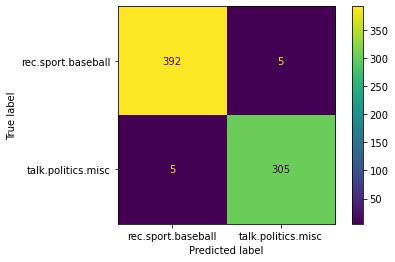

In [17]:
plot_confusion_matrix(model, X_test, y_test, display_labels = target_classes.values())
plt.show()

C:\Users\dcv_2\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Train Accuracy: 1.0000
Logistic Regression Test Accuracy: 0.9406


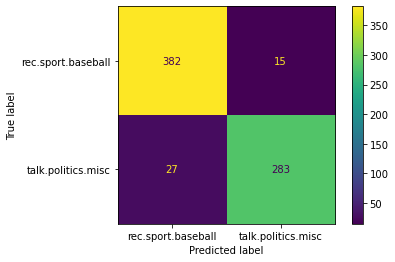

In [18]:
# for comparison...

from sklearn.linear_model import LogisticRegression

# Instantiating our model - just using default values
logreg = LogisticRegression(random_state=123)
# Fitting our model
logreg.fit(X_train,y_train)
# Making predictions 
train_preds_lr = logreg.predict(X_train)
y_preds_lr = logreg.predict(X_test)

# How'd we do?
print(f'Logistic Regression Train Accuracy: {accuracy_score(y_train, train_preds_lr):.4f}')
print(f'Logistic Regression Test Accuracy: {accuracy_score(y_test, y_preds_lr):.4f}')

plot_confusion_matrix(logreg, X_test, y_test, display_labels = target_classes.values())
plt.show()

## Different Naive Bayes Classifiers in SKLearn

AKA why'd we choose `MultinomialNB` above?

### Multinomial Naive Bayes

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

> "The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification)."
>
> -- SKLearn's Documentation page linked above

### Gaussian Naive Bayes

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

<img src="https://chrisalbon.com/images/machine_learning_flashcards/Gaussian_Naive_Bayes_Classifier_print.png" alt="Gaussian NB flashcard from Chris Albon" width=600>

> "Because of the assumption of the normal distribution, Gaussian Naive Bayes is best used in cases when all our features are continuous."
>
> -- [Chris Albon](https://chrisalbon.com/code/machine_learning/naive_bayes/gaussian_naive_bayes_classifier/) (also the source of the flashcard image)

### Others

SKLearn has also built out classes for [Complement Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html) (good for imbalanced datasets), [Bernoulli Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) (designed for binary/boolean input features), and [Categorical Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html) (good for discrete features that are categorically distributed) - check them out!

## Summary

>"In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters." 
>
> -- [SKLearn User Guide on Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

### Pros:

* It is an efficient way to predict class of test data set
* It perform well in multi class prediction
* When assumption of independence holds, a Naive Bayes classifier performs requires less training data and can perform better than models like logistic regression
* Works very well on a large number of input features (doesn't suffer from the same curse of dimensionality)
* Performs better with categorical inputs. For numerical input, one has to assume a normal distribution.


### Cons:

* Naive Bayes is also known as a bad estimator, so the probability outputs from `predict_proba` are not to be taken seriously
* We are assuming of independent predictors, but in real life, it is almost impossible that we get a set of predictors which are completely independent (amazingly, still works a lot of the time though!)